## Bias - Variance dillema - why we use validation?
How can we be sure that our algorithm is really representing the round truth of $F(X)$ and is not meorizing the dataset $y$? We now that it is impossible to *truly* know the $F(X)$. In most cases we will also not memorize the dataset. Created estimator $\hat{F(X))}$ will be something inbetween.

<img src="img/biasVarianceCurve.jpg" width="70%">

Source: https://www.quora.com/What-is-the-best-way-to-explain-the-bias-variance-trade-off-in-layman%E2%80%99s-terms

This problem is called Bias-Variance tradeoff. The theory behind it is well established and described with mathematical precision in the literature. Here we will focus on the intuition.

The more freedom we give to our estimator (more elasticity/variance) the easier/better it will fit the training data. Therefore it will achieve lower error (bias) on the training set. At the same time the higher the variability the higher the risk of overfitting. Although theoretically we can be lowering the expected value of error (bias) it is usually done with the increase of error variance. We can land in a situation where, when we make prediction on new data, the error is very high due to variance (even though it can be zero on average).

To understand it lets look at this picture:
<img src="img/biasVarianceTarget.jpg" width="30%">

Source: https://www.quora.com/What-is-the-best-way-to-explain-the-bias-variance-trade-off-in-layman%E2%80%99s-terms

In practice higher variance usually means higher error (on new data). This problem is perfectly visible in the following illustration.
<img src="img/biasVarianceValid.png" width="50%">
Source: Elements of Statistical learning

The red line represents the error on "new" data and blue line on the training data. When we look at this image it seems that the answer to the question of optimal complexity. In the end we want our model to work as good as possible on new data and not on training data. It seems that chosing the complexity level for which the red line is the lowest is optimal.

## Cross Validation (CV)
Cross validation is in the esence a process as described above. We split the data into training and validation samples. We use training data to create our estimator and validation data to check how it will work on "new", out of sample data.
<img src="img/cv.jpg">
Source: Wikipedia

In such process a lot depends on the realization of the random split. The results may vary heavily on different realizations. We cannot treat the value in a single validation as a very good approximation of ground truth.

### Cross Validation - what for?
We use cross validation mainly  for one of two reasins:
* Getting an objective evaluation of "real" effectivness of our model.
* Tuning of models hyperparameters. Hyperaparameters are those arguments that we need to send by hand, are not part of algorithm optimization. Model complexity is often on of those hyper parameters as in the example above.

### K-Fold Cross validation (k-fold CV)
To get more reliable evaluation of our model a k-fold cross validation is used. We repeat the process of CV K times in such a way that 1/K of all $y$ observations are used for validation and the rest for training. We repeat the procedure K times in such a way that every observation is used for validation only once.
<img src="img/cvKfold.jpg">
Source: Wikipedia

Most common values for K are 5 or 10. In the end a result of k-fold cv is the average value of our metric across all validation sets.

*Notice.* The result of k-fold cv will be different each time as the process of splitting is random.

### Leave-One-Out Cross Validation (LOO CV)
The moste extreme form of k-fold CV is Leave-One-Out Cross Validation (LOO CV). In this case K is equal to N, where N is total number of observations. One might think that this must be "the best" CV method as it is the most detailed with a lot of averaging and our training data is as big as possible each time. However, there are shortcomings. Each time our estimator will be very similar as the differences between training data are small. This decreases the value of information we get in the cv process in this case as we do not test our algorithm in "different scenarios" (treining sets). One important characteristic of LOO CV is that we get the same result each time we run it.

### Repeated Cross Validation
In most cases running a k-fold CV is good enough. Sometimes however we need to get as accurate evaluation as possible. We can take advantage of the randomness and simply run k-fold several times and average the results.

### Bootstrap cross validation
Last cv technique is bootstrap. It works by sampling with replacement N observations from our data set of N observations as training data. As we draw with replacement some observations are repeated and some are not drawn at all. The samples that have not been drawn are treated as validation set. We repeat this procedure multiple times to get the distribution of evaluation metric on validation set.

## CV Methods - which one to chose?
There is no consensus about the best CV method. Neither among practicioners nor in academia. Theoretically it seems that k-fold (repeated) and bootstrap are two main choices. In everyday use k-fold seems most popular. It may be due to the fact that when we do bootstrap cv there is a good chance that some observations will never be part of validation set. Additionally some people see duplication of observations as an important shortcoming.

If we decide to use k-fold there is one more question to answer. Should it be 5, 10 or some other k-fold? On one hand we want our training set to be as big as possible to avoid overfitting. On the other we want to have some variability of training set and stability of results in validation sets. Again, there is no one best answer and one should test different options and do repeated k-fold if more precision is needed.

## How to setup Cross Validation?
Although in theory the procedure of CV is very simple, it is very easy to make mistakes that in some scenarios are very costly.

### Stratify
One of the problems we can encounter is the balance of labels in training and validation sets. This is especially important when we work on imbalanced data. In datasets where there are few "1" in general it is easy to imagine a situation in which we draw no or relatively very little "1"s. It can lead to bias and/or big variance of our evaluation metric on the validation data set. Because of this problem we often enforce equal balance using stratification.

For example in case of 5-fold cv you can imagine that we make the split for traingin and validation sets separately for "1"s and "0"s. This quarantees equal balance in both groups.

### Time series analysis
The hardest dataset to set up proper cross validation is time series analysis. Due to the fact that all observations are usualy linked (not independant over time), each observation depends on previous realizations. Because of this property we cannot simply randomly draw observations into two samples and use different permutations. Observations that are next to each other in time contain simply too much information about each other to have them in different sets (train and validation).

One solution is to make a natural time-based split. We use "past" observations as training data and "future" observations as validation set. Just like in the illustration below.
<img src="img/cvTimeSeries.png" width="50%">

Source: https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/

### Information leakage
Independance of observation between training and validation set is a crucial requirement for the procedure to deliver expected results. Its importance is clearly visible in time series analysis. However, it is also possible to have information leakage even in regular classification and regression problems, when the independence requirement is not met.

In this case, when observations are not independent, we cannot treat validation set as a true *out of sample* data. This results in underestimation of error on validation set and can lead to heavy overestimation and result in a model that simply doesn't work in deployment.

Having mutiple observations for one person in our data set is one example of data structure in which it is easy to break independence of data. Other example might be usage of data from many persons from one household.

The errors in setup of cross validation process are very easy to make and hard to spot. Even in competition on kaggle data leakage happens from time to time when the sets are prepared by experienced professionals. Always try to know your data and set up your CV with care.

## Train Validate Test
At this point we should point to one important problem with the statements made at the begining. We said that we can use results from validation set to choose values for hyperparameters of our algorithm. However, this means that we are transfering information from validation set to training (data leakage). Doing this, if abused, can lead to biased evaluation and suboptimal model. Usually the information leakage is small and insignificant, however in cases where we heavily rely on validation set for algorithm tuning, we should use train, validate, test procedure. The idea is exactly the same as in validation but we add one more step. We save part of the data (test) at the begining that we do not use at all in training process. Then, in the end, when everything is ready we test our model with it.
<img src="img/cvTVT.png">
Source:https://am207.github.io/2017/wiki/validation.html

### Train Validate Test in practice
Splitting our dataset in three parts, as everything in machinr learning, has both advantages and shortcomings. Obviously the main advantage is getting pure and reliable evaluation of the model. We cannot forget about disadvantages too:
* Separating the test set decreases the number of observations in our training set. It increases the risk of overfitting and cen results in a worse predictive power of our model.
* In a basic approach we separate only one part of the set as test. This means that we rely again on one realization of some  random process. This means that we can get very different results reach time even if we repeat whole training procedure exactly the same.

Aforementioned problems have two possible solutions. We can do a k-fold train-test/validate. It reduces the variance of the results in test set. On the other hand, it increases the complexity of our ML pipeline and does not alleviate the problem of reduced number of observations for training.

Alternatively we can say that our real test set will come later. We will simply wait for new data from the market that will be generated at the time of our model creation. This type of test data is perfect as it comes from the future. This is often a good choice as correctly implemented repeated k-fold cv should bu fully sufficient to chose the best model and optimize its hyperparameters.

In the end one needs to chose a proper solution for a specific problem remembering about the type of algorithms we are planning to use and understanding the business need for current ML problem.

## Cross validation in Python
Most of the methods for cross validation are really well implemented in sklearn.

http://scikit-learn.org/stable/modules/cross_validation.html


In [1]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
import matplotlib.pyplot as plt
import gc
from sklearn.metrics import roc_auc_score

plt.style.use('seaborn-ticks')
%matplotlib inline

Lets get back to our medical set.

In [2]:
%cd C:
medical = pd.read_csv("data/medical_care.csv")
print(medical.shape)
pd.set_option("display.max_columns", 50)
medical.head()

C:
(35072, 29)


UMARSTAT UCUREMP UCURNINS              USATMED  URELATE  \
0          Never married      No      Yes       Very satisfied        2   
1              Separated     Yes       No       Very satisfied        2   
2  Married_live together      No       No       Very satisfied        5   
3               Divorced      No      Yes  Little dissatisfied        4   
4          Never married     Yes       No       Very satisfied        0   

    REGION STATE      HHID FHOSP  FDENT  FEMER  FDOCT         UIMMSTAT  \
0  Midwest    WI  55616128    No      0      0      0  US-born citizen   
1  Midwest    WI  54704000    No      2      0      0  US-born citizen   
2  Midwest    WI  57874272    No      0      1      0  US-born citizen   
3  Midwest    WI  54106816    No      0      0      1  US-born citizen   
4  Midwest    WI  54569152    No      2      0      0  US-born citizen   

  U_USBORN  UAGE     U_FTPT  U_WKSLY  U_HRSLY  U_USHRS  HEARNVAL  HOTHVAL  \
0      Yes    22  Full-time     52.0       40       40         0        0   
1      Yes    30  Full-time     52.0       40       40     31468     5950   
2      Yes    33  Part-time     52.0       30       30     24700    11340   
3      Yes    41  Part-time     43.0       40       25     60000    39002   
4      Yes    34  Full-time     52.0       40       40     55280     4200   

   HRETVAL  HSSVAL  HWSVAL UBRACE  GENDER  \
0        0       0       0  White  Female   
1        0       0   31468  White  Female   
2        0    4920   24700  White    Male   
3        0       0   60000  Black  Female   
4        0       0   55280  Black    Male   

                                    UEDUC3  CEYES  CHAIR  
0                     No HS diploma or GED  hazel  brown  
1  HS diploma or GED, no bachelor's degree   blue  black  
2                     No HS diploma or GED  brown  brown  
3                     No HS diploma or GED  brown  black  
4  HS diploma or GED, no bachelor's degree  brown  black

Now lets encode UCURNINS variable and run the regression on our full dataset.

In [3]:
medical["UCURNINS"] = (medical.UCURNINS == "Yes").astype(int)

In [4]:
mod = sm.GLM.from_formula(formula = 'UCURNINS ~ UMARSTAT + USATMED + URELATE + REGION + FHOSP + FDENT + FEMER + FDOCT + ' + 
                          'UIMMSTAT + UAGE + U_FTPT + U_WKSLY + U_USHRS + HOTHVAL + HRETVAL + HSSVAL + HWSVAL + UBRACE + ' + 
                          'UEDUC3 + GENDER',
                          data = medical,
                          family = sm.families.Binomial())
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               UCURNINS   No. Observations:                35072
Model:                            GLM   Df Residuals:                    35036
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11126.
Date:                Fri, 25 Mar 2022   Deviance:                       22251.
Time:                        18:38:19   Pearson chi2:                 4.05e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             0.9019      0.216      4.166      0.000       0.478       1.326
UMARSTAT[T.Married, do not live together]            -0.4264      0.166     -2.563      0.010      -0.752      -0.100
UMARSTAT[T.Married_live together]                    -0.8331      0.056    -14.774      0.000      -0.944      -0.723
UMARSTAT[T.Never married]                            -0.3337      0.064     -5.210      0.000      -0.459      -0.208
UMARSTAT[T.Partnership]                               0.3966      0.085      4.677      0.000       0.230       0.563
UMARSTAT[T.Separated]                                -0.0527      0.095     -0.553      0.580      -0.239       0.134
UMARSTAT[T.Unknown]                                   0.6720      0.388      1.732      0.083      -0.089       1.433
UMARSTAT[T.Widowed]                                  -0.1727      0.144     -1.197      0.231      -0.455       0.110
USATMED[T.Little satisfied]                          -0.4597      0.063     -7.324      0.000      -0.583      -0.337
USATMED[T.No opinion]                                 0.6913      0.098      7.025      0.000       0.498       0.884
USATMED[T.Very dissatisfied]                          0.5547      0.092      6.017      0.000       0.374       0.735
USATMED[T.Very satisfied]                            -0.7287      0.062    -11.668      0.000      -0.851      -0.606
REGION[T.Northeast]                                  -0.0486      0.057     -0.858      0.391      -0.159       0.062
REGION[T.South]                                       0.7221      0.047     15.439      0.000       0.630       0.814
REGION[T.West]                                        0.4020      0.049      8.143      0.000       0.305       0.499
FHOSP[T.Yes]                                         -0.2438      0.075     -3.254      0.001      -0.391      -0.097
UIMMSTAT[T.Foreign-born, non-citizen]                 0.7271      0.089      8.172      0.000       0.553       0.901
UIMMSTAT[T.US-born citizen]                          -0.5706      0.080     -7.114      0.000      -0.728      -0.413
U_FTPT[T.Part-time]                                   0.4966      0.058      8.526      0.000       0.382       0.611
UBRACE[T.Asian/Pacific Islander]                     -0.9828      0.161     -6.104      0.000      -1.298      -0.667
UBRACE[T.Black]                                      -0.4685      0.126     -3.710      0.000      -0.716      -0.221
UBRACE[T.White]                                      -0.5119      0.118     -4.338      0.000      -0.743      -0.281
UEDUC3[T.HS diploma or GED, no bachelor's degree]     0.8375      0.053     15.828      0.000       0.734       0.941
UEDUC3[T.No HS 

In [10]:
roc_auc_score(y_test, preds)

0.8210254067481276

For simple splits we can use train_test_split. This method will split the data set of features and a column with our dependant variable.
We can define the random state or initialize it with a random number. Having control over randomness of our splits can help a lot with reproductibility in some cases. To see the differenr run a couple times a cell above and below.

In [5]:
from sklearn.model_selection import train_test_split
import random

X_train, X_test, y_train, y_test = train_test_split(medical,
                                                    medical.UCURNINS,
                                                    test_size = 0.3,
                                                    random_state = random.randint(0, 1000))
print(X_train.shape, X_test.shape)
mod = sm.GLM.from_formula(formula = 'UCURNINS ~ UMARSTAT + USATMED + URELATE + REGION + FHOSP + FDENT + FEMER + FDOCT + ' + 
                          'UIMMSTAT + UAGE + U_FTPT + U_WKSLY + U_USHRS + HOTHVAL + HRETVAL + HSSVAL + HWSVAL + UBRACE + ' + 
                          'UEDUC3 + GENDER',
                          data = X_train,
                          family = sm.families.Binomial())
res = mod.fit()
res.summary()
preds = res.predict(X_test)

roc_auc_score(y_test, preds)

(24550, 29) (10522, 29)


0.825187816883165

We can very easily emply stratify with just one argument. We just need to set the column for stratification.

In [19]:
scores = []

for k in range(100) :
    
    X_train, X_test, y_train, y_test = train_test_split(medical,
                                                        medical.UCURNINS,
                                                        stratify = medical.UCURNINS,
                                                        test_size = 0.3,
                                                        random_state = random.randint(0, 10000))
    # print(X_train.shape, X_test.shape)
    mod = sm.GLM.from_formula(formula = 'UCURNINS ~ UMARSTAT + USATMED + URELATE + REGION + FHOSP + FDENT + FEMER + FDOCT + ' + 
                              'UIMMSTAT + UAGE + U_FTPT + U_WKSLY + U_USHRS + HOTHVAL + HRETVAL + HSSVAL + HWSVAL + UBRACE + ' + 
                              'UEDUC3 + GENDER',
                              data = X_train,
                              family = sm.families.Binomial())
    res = mod.fit()
    res.summary()
    preds = res.predict(X_test)
    scores.append(roc_auc_score(y_test, preds))
    # print(scores[-1])

As we can see, in case of logistic regression on this data set there is very little difference with and without stratification. Our "1" label is represented well enough (5 000 observations) for randomness to work well enough with 0.7 and 0.3 split.

In [13]:
medical.UCURNINS.value_counts()

0    30006
1     5066
Name: UCURNINS, dtype: int64

#### Let's see some diagnostics...

In [64]:
df = pd.DataFrame(data = scores, columns = ['scores'])
print(df.scores.describe())
print(f'Kurtosis \t %s' %round(df.scores.kurtosis(), 5)) # This one returns 'normalized' kurtosis (i.e. 0 instead of 3).
print(f'Skewness \t %s' %round(df.scores.skew(), 5))

count    100.000000
mean       0.827693
std        0.004970
min        0.816923
25%        0.824000
50%        0.827464
75%        0.831290
max        0.842368
Name: scores, dtype: float64
Kurtosis 	 -0.21257
Skewness 	 0.00605


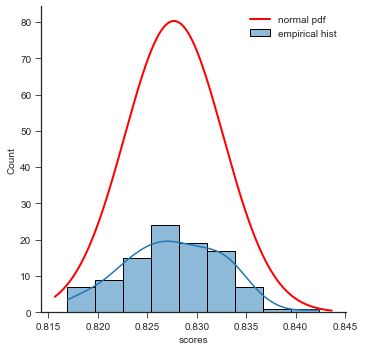

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.displot(data = df.scores, kde = True, label = 'empirical hist')
x0, x1 = ax.ax.get_xlim()
x_pdf = np.linspace(x0, x1, len(df))
y_pdf = stats.norm.pdf(x_pdf, df.scores.mean(), df.scores.std())
ax.ax.plot(x_pdf, y_pdf, 'r', lw = 2, label = 'normal pdf')
ax.ax.legend()

In [67]:
from scipy import stats 

alpha = 1e-3

k2, p = stats.normaltest(df.scores) # Kurtosis and skewness normality test.

if p < alpha :

    print('Kurtosis, Skewness test: The null hypothesis about normality can be rejected.')

else:

    print('Kurtosis, Skewness test: The null hypothesis about normality can not be rejected.')

# Kolmogorov Smirnov normality test.
ks = stats.kstest(df.scores, 'norm')

if ks[1] < alpha :

    print('Kolmogorov Smirnov test: The null hypothesis about normality can be rejected.')

else:

    print('Kolmogorov Smirnov test: The null hypothesis about normality can not be rejected.')

# Do you remember that @kstest function requires NORMALIZATION of sample?
ks = stats.kstest((df.scores - df.scores.mean()) / df.scores.std(), 'norm')

if ks[1] < alpha :

    print('Kolmogorov Smirnov (normalized sample) test: The null hypothesis about normality can be rejected.')

else:

    print('Kolmogorov Smirnov (normalized sample) test: The null hypothesis about normality can not be rejected.')

Kurtosis, Skewness test: The null hypothesis about normality can not be rejected.
Kolmogorov Smirnov test: The null hypothesis about normality can be rejected.
Kolmogorov Smirnov (normalized sample) test: The null hypothesis about normality can not be rejected.


We can now check the tendency to overfitting in logistic regression. As you can see below we need to reduct the train data set size to only 10% to really start overfitting. This show great resilience to overfitting problem.

In [31]:
for k in range(1, 10) :
    
    X_train, X_test, y_train, y_test = train_test_split(medical,
                                                        medical.UCURNINS,
                                                        test_size = 0.1 * k,
                                                        random_state = 0)
    mod = sm.GLM.from_formula(formula = 'UCURNINS ~ UMARSTAT + USATMED + URELATE + REGION + FHOSP + FDENT + FEMER + FDOCT + ' + 
                              'UIMMSTAT + UAGE + U_FTPT + U_WKSLY + U_USHRS + HOTHVAL + HRETVAL + HSSVAL + HWSVAL + UBRACE + ' + 
                              'UEDUC3 + GENDER',
                              data = X_train,
                              family = sm.families.Binomial())
    res = mod.fit()
    predsTrain = res.predict(X_train)
    preds = res.predict(X_test)
    print("Train AUC:", round(roc_auc_score(y_train, predsTrain), 4), "Valid AUC:", round(roc_auc_score(y_test, preds), 4))

Train AUC: 0.8301 Valid AUC: 0.8196
Train AUC: 0.8305 Valid AUC: 0.8228
Train AUC: 0.8306 Valid AUC: 0.8242
Train AUC: 0.8293 Valid AUC: 0.8273
Train AUC: 0.8285 Valid AUC: 0.8278
Train AUC: 0.8327 Valid AUC: 0.8246
Train AUC: 0.8326 Valid AUC: 0.8251
Train AUC: 0.835 Valid AUC: 0.8227
Train AUC: 0.8514 Valid AUC: 0.8205


For k-fold CV we do not get datasets but rather indices for the sets. This is done to avoid unecessary duplication of datasets. Lets run 10-fold CV and see the results. For k-fold we need to add shuffle = True.

In [32]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 10, shuffle = True, random_state = random.randint(0, 10000))

for train, test in kf.split(medical.index.values) :
    
    mod = sm.GLM.from_formula(formula = 'UCURNINS ~ UMARSTAT + USATMED + URELATE + REGION + FHOSP + FDENT + FEMER + FDOCT + ' + 
                              'UIMMSTAT + UAGE + U_FTPT + U_WKSLY + U_USHRS + HOTHVAL + HRETVAL + HSSVAL + HWSVAL + UBRACE + ' + 
                              'UEDUC3 + GENDER',
                              data = medical.iloc[train],
                              family = sm.families.Binomial())
    res = mod.fit()
    predsTrain = res.predict(medical.iloc[train])
    preds = res.predict(medical.iloc[test])
    print("Train AUC:", round(roc_auc_score(medical.iloc[train].UCURNINS, predsTrain), 4), "Valid AUC:",
          round(roc_auc_score(medical.iloc[test].UCURNINS, preds), 4))


Train AUC: 0.8289 Valid AUC: 0.8291
Train AUC: 0.8291 Valid AUC: 0.8281
Train AUC: 0.8282 Valid AUC: 0.8354
Train AUC: 0.8299 Valid AUC: 0.8207
Train AUC: 0.8296 Valid AUC: 0.8236
Train AUC: 0.8289 Valid AUC: 0.8292
Train AUC: 0.8306 Valid AUC: 0.8143
Train AUC: 0.828 Valid AUC: 0.8388
Train AUC: 0.8289 Valid AUC: 0.8285
Train AUC: 0.829 Valid AUC: 0.8276


As we can see the results vary a lot from sample to sample. W see values from 0.81 to 0.838 on validation sets.

To understand the problem of variance even more, lets see the results for 5-fold CV. The variance of results seems slightly lower for 10-fold CV. This is natural as logistic regression does not overfit too much and we increase the size of validation set (that stabilizes the results on validation samples).

In [58]:
kf = KFold(n_splits = 5, shuffle = True, random_state = random.randint(0, 10000))

for train, test in kf.split(medical.index.values) :
    
    mod = sm.GLM.from_formula(formula = 'UCURNINS ~ UMARSTAT + USATMED + URELATE + REGION + FHOSP + FDENT + FEMER + FDOCT + ' + 
                              'UIMMSTAT + UAGE + U_FTPT + U_WKSLY + U_USHRS + HOTHVAL + HRETVAL + HSSVAL + HWSVAL + UBRACE + ' + 
                              'UEDUC3 + GENDER',
                              data = medical.iloc[train],
                              family = sm.families.Binomial())    
    res = mod.fit()
    predsTrain = res.predict(medical.iloc[train])
    preds = res.predict(medical.iloc[test])
    print("Train AUC:", round(roc_auc_score(medical.iloc[train].UCURNINS, predsTrain), 4),
          "Valid AUC:", round(roc_auc_score(medical.iloc[test].UCURNINS, preds), 4))


Train AUC: 0.827 Valid AUC: 0.8353
Train AUC: 0.8294 Valid AUC: 0.8273
Train AUC: 0.8317 Valid AUC: 0.8168
Train AUC: 0.8268 Valid AUC: 0.8372
Train AUC: 0.8311 Valid AUC: 0.8203


Lets see the problem of variance with more detail. Lets run 10-fold CV 10 times and see the variance of averages.

In [59]:
for z in range(10) :
    
    trainRes = []
    valRes = []
    kf = KFold(n_splits = 10, shuffle = True, random_state = random.randint(0, 10000))
    
    for train, test in kf.split(medical.index.values):
        
        mod = sm.GLM.from_formula(formula = 'UCURNINS ~ UMARSTAT + USATMED + URELATE + REGION + FHOSP + FDENT + FEMER + FDOCT + ' + 
                              'UIMMSTAT + UAGE + U_FTPT + U_WKSLY + U_USHRS + HOTHVAL + HRETVAL + HSSVAL + HWSVAL + UBRACE + ' + 
                              'UEDUC3 + GENDER',
                              data = medical.iloc[train],
                              family = sm.families.Binomial())          
        res = mod.fit()
        predsTrain = res.predict(medical.iloc[train])
        preds = res.predict(medical.iloc[test])
        trainRes.append(roc_auc_score(medical.iloc[train].UCURNINS, predsTrain))
        valRes.append(roc_auc_score(medical.iloc[test].UCURNINS, preds))
        
    print("Train AUC:", round(np.mean(trainRes), 4), "Valid AUC:", round(np.mean(valRes), 4))


Train AUC: 0.8291 Valid AUC: 0.8274
Train AUC: 0.8291 Valid AUC: 0.8277
Train AUC: 0.8291 Valid AUC: 0.8277
Train AUC: 0.8291 Valid AUC: 0.8276
Train AUC: 0.8291 Valid AUC: 0.8277
Train AUC: 0.8291 Valid AUC: 0.8275
Train AUC: 0.8291 Valid AUC: 0.827
Train AUC: 0.8291 Valid AUC: 0.8276
Train AUC: 0.8291 Valid AUC: 0.8275
Train AUC: 0.8291 Valid AUC: 0.8273


Now let's do the same for 5-fold CV.

In [60]:
for z in range(10) :
    
    trainRes = []
    valRes = []
    kf = KFold(n_splits = 5, shuffle = True, random_state = random.randint(0, 10000))
    
    for train, test in kf.split(medical.index.values) :
        
        mod = sm.GLM.from_formula(formula = 'UCURNINS ~ UMARSTAT + USATMED + URELATE + REGION + FHOSP + FDENT + FEMER + FDOCT + ' + 
                              'UIMMSTAT + UAGE + U_FTPT + U_WKSLY + U_USHRS + HOTHVAL + HRETVAL + HSSVAL + HWSVAL + UBRACE + ' + 
                              'UEDUC3 + GENDER',
                              data = medical.iloc[train],
                              family = sm.families.Binomial()) 
        res = mod.fit()
        predsTrain = res.predict(medical.iloc[train])
        preds = res.predict(medical.iloc[test])
        trainRes.append(roc_auc_score(medical.iloc[train].UCURNINS, predsTrain))
        valRes.append(roc_auc_score(medical.iloc[test].UCURNINS, preds))
        
    print("Train AUC:", round(np.mean(trainRes), 4), "Valid AUC:", round(np.mean(valRes), 4))

Train AUC: 0.8292 Valid AUC: 0.8274
Train AUC: 0.8292 Valid AUC: 0.8272
Train AUC: 0.8292 Valid AUC: 0.8274
Train AUC: 0.8292 Valid AUC: 0.8273
Train AUC: 0.8292 Valid AUC: 0.8275
Train AUC: 0.8292 Valid AUC: 0.8274
Train AUC: 0.8292 Valid AUC: 0.8274
Train AUC: 0.8292 Valid AUC: 0.8273
Train AUC: 0.8292 Valid AUC: 0.8276
Train AUC: 0.8292 Valid AUC: 0.8274


It seems that for logistic regression has very stable results for both 5 and 10 fold validations. What's more, it does not overfit too much, as the difference in the value of our metric for train and validation sets is minimal.

In [61]:
predList = []
indList = []
kf = KFold(n_splits = 5, shuffle = True, random_state = random.randint(0, 10000))

for train, test in kf.split(medical.index.values) :
    
    mod = sm.GLM.from_formula(formula = 'UCURNINS ~ UMARSTAT + USATMED + URELATE + REGION + FHOSP + FDENT + FEMER + FDOCT + ' + 
                          'UIMMSTAT + UAGE + U_FTPT + U_WKSLY + U_USHRS + HOTHVAL + HRETVAL + HSSVAL + HWSVAL + UBRACE + ' + 
                          'UEDUC3 + GENDER',
                          data = medical.iloc[train],
                          family = sm.families.Binomial()) 
    res = mod.fit()
    predsTrain = res.predict(medical.iloc[train])
    preds = res.predict(medical.iloc[test])
    
    predList.append(preds.tolist())
    indList.append(medical.iloc[test].index.tolist())
    
    trainRes.append(roc_auc_score(medical.iloc[train].UCURNINS, predsTrain))
    valRes.append(roc_auc_score(medical.iloc[test].UCURNINS, preds))
    
print("Train AUC:", round(np.mean(trainRes), 4), "Valid AUC:", round(np.mean(valRes), 4))

Train AUC: 0.8292 Valid AUC: 0.8273


In [38]:
predsSorted = pd.Series(sum(predList, []), index = sum(indList, [])).sort_index()
roc_auc_score(medical.UCURNINS.sort_index(), pd.Series(sum(predList, []), index = sum(indList, [])).sort_index())

0.8274086596024656

In [57]:
from sklearn.model_selection import StratifiedKFold

predList = []
indList = []
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = random.randint(0, 10000))

for train, test in kf.split(medical.index.values, medical.UCURNINS) :
    
    mod = sm.GLM.from_formula(formula = 'UCURNINS ~ UMARSTAT + USATMED + URELATE + REGION + FHOSP + FDENT + FEMER + FDOCT + ' + 
                          'UIMMSTAT + UAGE + U_FTPT + U_WKSLY + U_USHRS + HOTHVAL + HRETVAL + HSSVAL + HWSVAL + UBRACE + ' + 
                          'UEDUC3 + GENDER',
                          data = medical.iloc[train],
                          family = sm.families.Binomial())
    res = mod.fit()
    predsTrain = res.predict(medical.iloc[train])
    preds = res.predict(medical.iloc[test])
    
    predList.append(preds.tolist())
    indList.append(medical.iloc[test].index.tolist())
    
    trainRes.append(roc_auc_score(medical.iloc[train].UCURNINS, predsTrain))
    valRes.append(roc_auc_score(medical.iloc[test].UCURNINS, preds))
    
print("Train AUC:", round(np.mean(trainRes), 4), "Valid AUC:", round(np.mean(valRes), 4))

Train AUC: 0.8292 Valid AUC: 0.8274


#### But, let's not forget about overall model quality...
Overwhelming majority of folks is insured, just by blind betting on someone's being insured we are correct in 85% of cases, and overall quality of our model is just slighty above it.

In [75]:
print(f'Overall percent of uninsured persons is %s' %round(medical.UCURNINS.sum() / medical.UCURNINS.count() * 100, 2))

Overall percent of uninsured persons is 14.44


In [76]:
print(f'Quality score for training set is %s' 
      %round(sum(medical.UCURNINS.iloc[train] == (predsTrain > 0.5) * 1) / len(train) * 100, 2))
print(f'Quality score for test set is %s' 
      %round(sum(medical.UCURNINS.iloc[test] == (preds > 0.5) * 1) / len(test) * 100, 2))

Quality score for training set is 87.09
Quality score for test set is 87.21


In [ ]:

#--------------------------------------------------------------------
# Exercises 4.

# Exercise 4.1.

# Titanic passengers data – 1310 observations and 15 variables:

# passenger_id – Unique passenger id
# pclass – Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
# survived – Survival (0 = No, 1 = Yes)
# name – Name and SUrname
# sex – Sex (0 = Male, 1 = Female)
# age – Age in years
# sibsp – # of siblings / spouses aboard the Titanic
# parch – # of parents / children aboard the Titanic
# ticket – Ticket number
# fare – Passenger fare
# cabin – Cabin number
# embarked – Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
# boat – Lifeboat (if survived)
# body – Body number (if did not survive and body was recovered)
# home.dest – Home/Destination
# 
# Re-run your best models for all algorithms for 5-fold CV. 
# Check the stability of results for repeated K-fold
# Check in repeated k-fold CV if adding stratification changes your results (stability)
# Check if you didnt overfit in your models. Check if you can imrpove you validation score.

In [ ]:

# Exercise 4.2.
# Wine Quality Data Set: "data/wines.csv"
# source: https://archive.ics.uci.edu/ml/datasets/wine+quality
# The file contains data on samples of white and red Portuguese wine 
# Vinho Verde. 
# Various physico-chemical characteristics of individual samples
# are available as well as wine quality scores on a point scale (0-10) 
# made by specialists.

# Re-run your best models for all algorithms for 5-fold CV. 
# Check the stability of results for repeated K-fold
# Check in repeated k-fold CV if adding stratification changes your results (stability).
# Compare the effect of stratification with titanic problem.
# Check if you didnt overfit in your models. Check if you can imrpove you validation score.


